In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def deriv(function, time_step):
    derivative = []
    for i in range(1, len(function)):
        derivative.append((function[i] - function[i-1]) / time_step)
    return derivative

def trapezoidal_integral(function, time_step):
    integral = [0]
    cumulative_sum = 0
    for i in range(1, len(function)):
        cumulative_sum += time_step * (function[i-1] + function[i]) / 2
        integral.append(cumulative_sum)
    return integral

In [7]:
# Rendszerparaméterek
dt = 0.02  # Időlépés [s]
g = 9.81   # Gravitáció [m/s^2]
l = 0.5    # Inga hossza [m]
m = 0.1    # Inga tömege [kg]
M = 1.0    # Kocsi tömege [kg]
b = 0.1    # Súrlódás [N]

# Erősítési tényezők
Kp = 50
Ki = 5
Kd = 10 

# Szimuláció init
T = 5  # 5 másodpercig fog futni az egész
N = int(T / dt) # Ennyi darab lépés lesz

# Kezdeti feltételek (differenciálegyenlet esetén ezekre szükség van)
theta = np.pi + 0.1  # Eredeti pozíciója az ingának
theta_dot = 0 # Kezdeti szögsebesség
x = 0  # Kocsi pozíciója
x_dot = 0  # Kocsi sebessége

# Tömbök létrehozása az adatok tárolásához
theta_list = [theta] # valós theta értékek
theta_dot_list = [theta_dot] # szögsebességek tárolása
error_list = [theta - np.pi]  # (valós theta - referencia theta, azt szeretném, hogy egyenesen álljon)
control_list = [0]  # Beavatkozó jelet fogjuk itt tárolni minden időpillanatban (erő)

# A PID integráláshoz és deriváláshoz szükséges segédváltozók
integrated_error = error_list[0] * dt
previous_error = error_list[0]

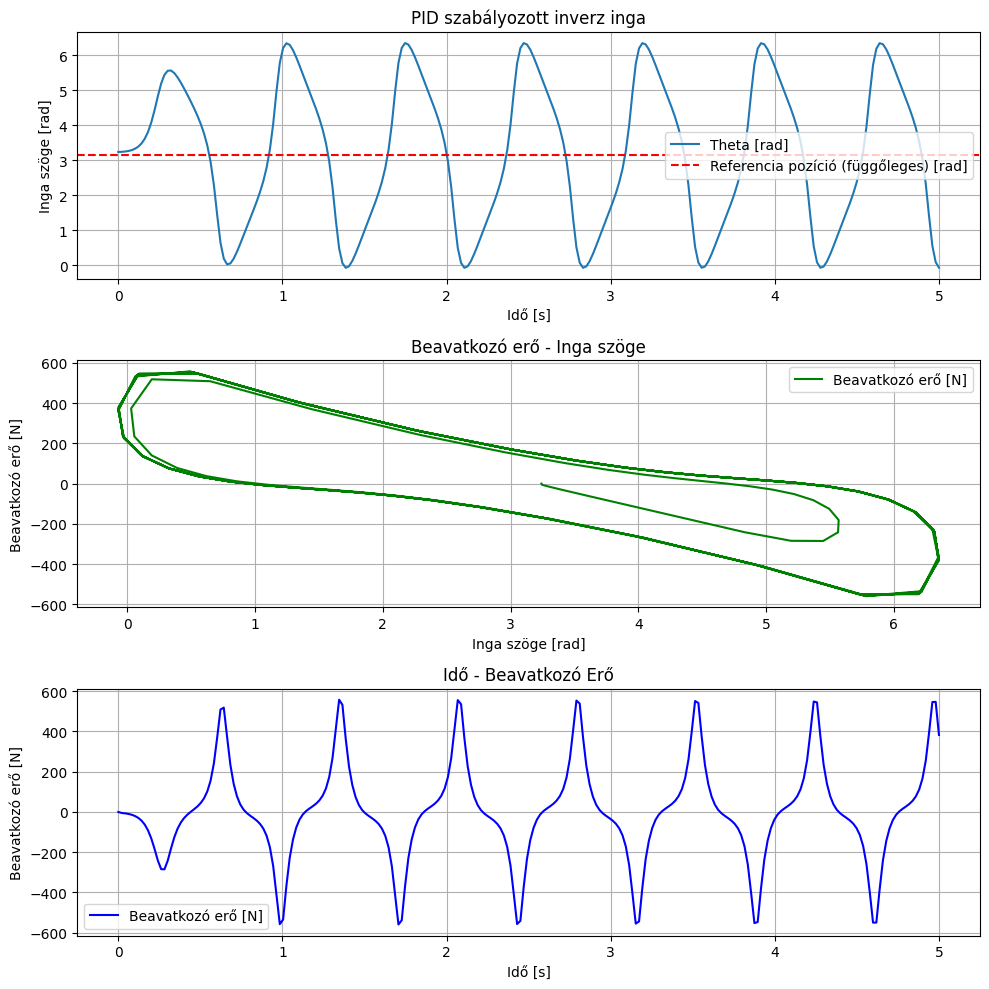

In [8]:
# Szimuláció fő ciklusa
for _ in range(0, N - 1):
    # Hibaszámítás (aktuális állapot vs. referencia: π)
    error = theta_list[-1] - np.pi
    error_list.append(error)
    
    # PID komponensek számítása
    P_term = Kp * error
    integrated_error += error * dt
    I_term = Ki * integrated_error
    D_term = Kd * (error - previous_error) / dt
    previous_error = error
    
    # Beavatkozó jel (erő) számítása – a hibának "ellen kell tartani"
    u = -(P_term + I_term + D_term)
    control_list.append(u)
    
    # Kocsi gyorsulása: x'' = (u - b*x_dot) / M
    x_ddot = (u - b * x_dot) / M
    
    # Inga szöggyorsulása: θ'' = (g/l)*sin(θ) + (x_ddot/l)*cos(θ)
    theta_ddot = (g / l) * np.sin(theta_list[-1]) + (x_ddot / l) * np.cos(theta_list[-1])
    
    # Euler integrálás: a szög- és lineáris változók frissítése
    theta_dot += theta_ddot * dt
    theta = theta_list[-1] + theta_dot * dt
    x_dot += x_ddot * dt
    x += x_dot * dt
    
    # Új értékek eltárolása
    theta_list.append(theta)
    theta_dot_list.append(theta_dot)

# Idő tengely előállítása a plotoláshoz
time_axis = np.linspace(0, T, N)

# Eredmények ábrázolása
plt.figure(figsize=(10, 10))

# 1. Inga szögének alakulása az idő függvényében
plt.subplot(3, 1, 1)
plt.plot(time_axis, theta_list, label="Theta [rad]")
plt.axhline(y=np.pi, color='r', linestyle='--', label="Referencia pozíció (függőleges) [rad]")
plt.xlabel("Idő [s]")
plt.ylabel("Inga szöge [rad]")
plt.title("PID szabályozott inverz inga")
plt.legend()
plt.grid()

# 2. Beavatkozó erő és inga szöge közötti kapcsolat
plt.subplot(3, 1, 2)
plt.plot(theta_list, control_list, label="Beavatkozó erő [N]", color='g')
plt.xlabel("Inga szöge [rad]")
plt.ylabel("Beavatkozó erő [N]")
plt.title("Beavatkozó erő - Inga szöge")
plt.legend()
plt.grid()

# 3. Beavatkozó erő időbeli alakulása
plt.subplot(3, 1, 3)
plt.plot(time_axis, control_list, label="Beavatkozó erő [N]", color='b')
plt.xlabel("Idő [s]")
plt.ylabel("Beavatkozó erő [N]")
plt.title("Idő - Beavatkozó Erő")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()